In [1]:
creatVars = locals()
def coverttime(df):
    df.TRADE_TYPE[df.TRADE_TYPE==21] = 1
    df.TRADE_TYPE[df.TRADE_TYPE==22] = 0
    df['time'] = df.START_DATE.apply(lambda x:x[:19])
    df['time'] = pd.to_datetime(df['time'],format='%Y-%m-%d-%H.%M.%S')
    df['week'] = df['time'].dt.dayofweek+1
    timedelta = df['time'] - pd.datetime(df['time'].dt.year[0],df['time'].dt.month[0],df['time'].dt.day[0],0,0,0)
    df['minstep'] = timedelta.dt.seconds/900
    df['minstep'] = df['minstep'].astype(int)
    return df

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
pd.options.display.max_columns = None

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
def pltinoutsta(df,plot=True):
    #统计每一个十分钟时间段，进出站的人数
    insta=[]
    outsta=[]
    minsteps=df['minstep'].unique()
    for minstep in minsteps:
        insta.append((df[df['minstep']==minstep]['TRADE_TYPE']==1).sum())
        outsta.append((df[df['minstep']==minstep]['TRADE_TYPE']==0).sum())
    if plot==True:
        plt.plot(minstep,insta,color='red',label='insta')
        plt.plot(minstep,outsta,color='green',label='outsta')
        plt.show()
    else:
        pass
    return minsteps,insta,outsta

In [16]:
path = '../dataofweek/'

In [17]:
monday = [121,131,141,151,161,171]

In [18]:
def abstract1(df,w):
    df = coverttime(df)
    df = df[df.week==1]
    df.week=monday[w]
    return df

In [19]:
w_list = ['12','13','14','15','16','17']

In [20]:
data1 = pd.DataFrame()

In [21]:
for i in range(6):
    df = pd.read_csv(path+w_list[i]+'_week.csv')
    df = abstract1(df,i)
    data1 = pd.concat([data1,df],axis=0,ignore_index=True)

In [22]:
week_list = [121,131,141.,151]

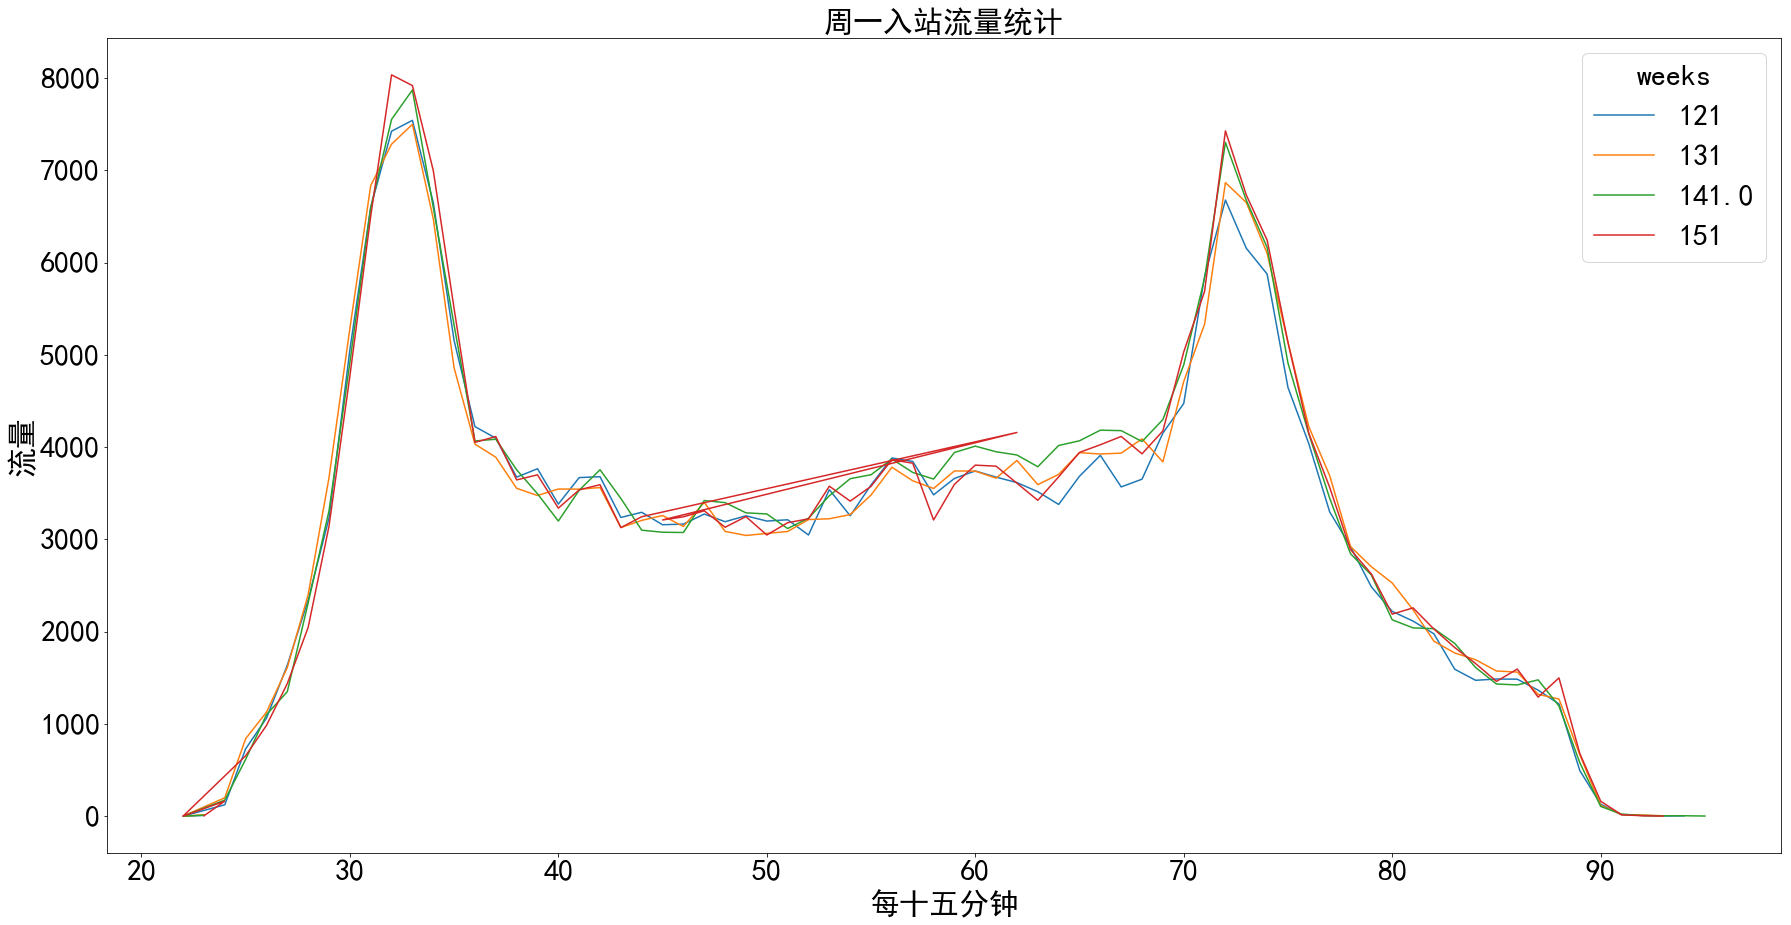

In [25]:
#12/13/14/16的周一
fig = plt.figure(figsize=(30,15))
for i in week_list:
    
    data = data1[data1.week==i]
    
    minsteps,instas,outstas = pltinoutsta(data,plot=False)
    plt.plot(minsteps, instas, label=i)

plt.title('周一入站流量统计', fontsize=30)
legend=plt.legend(title='weeks', fontsize=30)
legend.get_title().set_fontsize(fontsize=30)

plt.tick_params(labelsize=30)
plt.xlabel('每十五分钟',size=30)
plt.ylabel('流量',size=30)
plt.savefig('./pic/Monday_in.png')
plt.show()

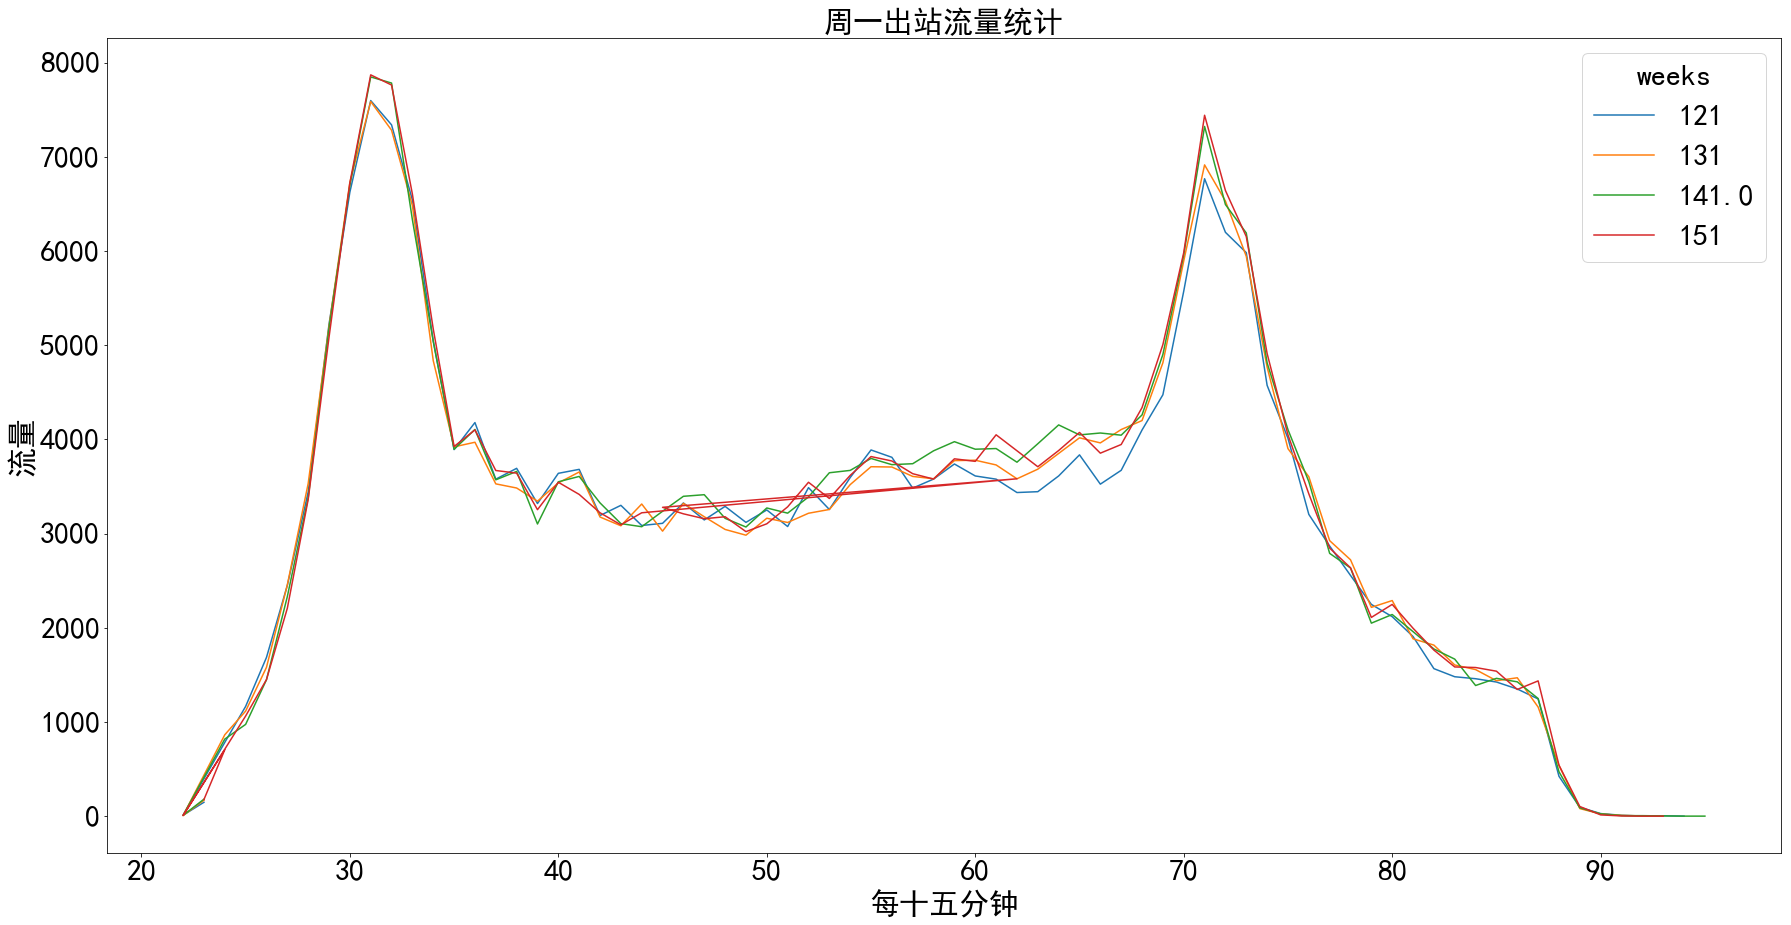

In [26]:
#12/13/14/16的周一
fig = plt.figure(figsize=(30,15))
for i in week_list:
    
    data = data1[data1.week==i]
    
    minsteps,instas,outstas = pltinoutsta(data,plot=False)
    plt.plot(minsteps, outstas, label=i)

plt.title('周一出站流量统计', fontsize=30)
legend=plt.legend(title='weeks', fontsize=30)
legend.get_title().set_fontsize(fontsize=30)

plt.tick_params(labelsize=30)
plt.xlabel('每十五分钟',size=30)
plt.ylabel('流量',size=30)
plt.savefig('./pic/Monday_out.png')
plt.show()